In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
%pip install wget

# 1. Load peptdeep models

In [ ]:
import os
import wget
if not os.path.exists('sandbox/test_files'):
    os.makedirs('sandbox/test_files')
def download_data(url, file_path):
    if not os.path.exists(file_path):
        wget.download(url, file_path)

from peptdeep.utils import (
    evaluate_linear_regression, evaluate_linear_regression_plot
)

from peptdeep.pretrained_models import ModelManager

models = ModelManager()
models.load_installed_models()

In [ ]:
ms2_model = models.ms2_model
ms2_model.get_parameter_num()

3988974

In [ ]:
rt_model = models.rt_model
rt_model.get_parameter_num()

708224

In [ ]:
ccs_model = models.ccs_model
ccs_model.get_parameter_num()

713452

# 2. Test ccs_model

In [ ]:
from alphabase.io.psm_reader import psm_reader_provider
ccs_url = 'https://datashare.biochem.mpg.de/s/uTGa7PliZzRJU4g/download'
ccs = 'sandbox/test_files/PXD019086_Celegant_evidence.txt'
download_data(ccs_url, ccs)
mq_reader = psm_reader_provider.get_reader('maxquant')
mq_reader.load(ccs)

/Users/zengwenfeng/Workspace/AlphaBase/alphabase/io/psm_reader/psm_reader.py:208: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  origin_df = self._load_file(_file)


,sequence,charge,rt,ccs,mobility,spec_idx,raw_name,precursor_mz,score,proteins,genes,decoy,mods,mod_sites,nAA,rt_norm
0,LLEDIRK,2,17.960,313.983480,0.771909,3856,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,443.771460,51.456,Q9BKU3,,0,,,7,0.149942
1,HLQLAVR,2,17.642,302.866472,0.743901,3300,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,418.758687,88.201,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,,,7,0.155532
2,HLQLAVR,2,18.518,304.133904,0.747014,3646,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,418.758687,79.833,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,,,7,0.154342
3,HLQLAVR,1,18.518,276.501981,1.358263,3647,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,836.510097,64.547,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,,,7,0.154342
4,HLQLAVR,1,17.579,274.632075,1.349078,2898,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,836.510097,84.064,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,,,7,0.147191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141500,TAPSAIPLAAPALPVPVAAAPFFASPAPVLAAPAPLLAPPAPVFAAPR,3,107.880,774.159191,1.284714,53805,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1511.532720,40.394,Q22263,,0,,,48,0.926486
141501,TAPSAIPLAAPALPVPIAAAPFFTPPAPVLAAPAPLLAPPAPVFAAPR,4,108.520,1086.345571,1.352140,51480,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1147.413090,4.313,Q22262,,0,,,48,0.958742
141502,TAPSAIPLAAPALPVPIAAAPFFTPPAPVLAAPAPLLAPPAPVFAAPR,3,108.580,781.523487,1.296982,32092,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1529.548370,58.044,Q22262,,0,,,48,0.916983
141503,TAPSAIPLAAPALPVPIAAAPFFTPPAPVLAAPAPLLAPPAPVFAAPR,3,108.460,775.979047,1.287781,53839,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1529.548370,115.420,Q22262,,0,,,48,0.931467


## CCS prediction is very good

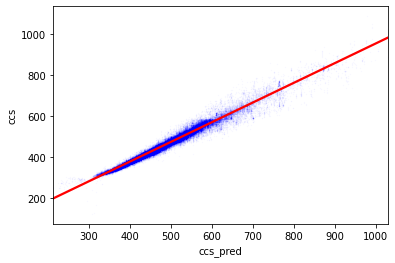

/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.97,0.984886,0.959,-4.8818,141505.0


In [ ]:
psm_df = mq_reader.psm_df#.groupby(['sequence','mods','mod_sites','nAA','charge'])['ccs'].median().reset_index()
predict_df = ccs_model.predict(psm_df)
evaluate_linear_regression_plot(predict_df, x='ccs_pred',y='ccs')
evaluate_linear_regression(predict_df, x='ccs_pred',y='ccs')

## Transfer learning on CCS does not provide much help

[Training] Epoch=1, Mean Loss=29.430573987960816
[Training] Epoch=2, Mean Loss=24.4880450129509
[Training] Epoch=3, Mean Loss=22.602557873725893
[Training] Epoch=4, Mean Loss=22.95404496192932
[Training] Epoch=5, Mean Loss=22.353219962120058
[Training] Epoch=6, Mean Loss=21.07235941886902
[Training] Epoch=7, Mean Loss=20.550406634807587
[Training] Epoch=8, Mean Loss=20.36421219110489
[Training] Epoch=9, Mean Loss=20.43486933708191
[Training] Epoch=10, Mean Loss=18.81518872976303


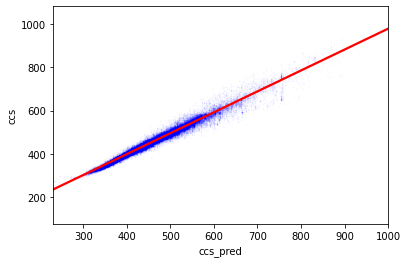

/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.972,0.985901,0.9648,13.7257,138446.0


In [ ]:
import numpy as np
import pandas as pd
n_train = 5000

from peptdeep.utils import uniform_sampling
train_df, test_df = uniform_sampling(psm_df, target='ccs', n_train=n_train, return_test_df=True)
ccs_model.train(train_df, verbose=True)
predict_df = ccs_model.predict(test_df)
evaluate_linear_regression_plot(predict_df, x='ccs_pred',y='ccs')
evaluate_linear_regression(predict_df, x='ccs_pred',y='ccs')

# 3. Test rt_model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def adjust_rt_pred(train_df, test_df, x='rt_pred', y='rt_norm', target='rt_adjust'):
    model = KNeighborsRegressor(n_neighbors=3, weights='distance')
    model.fit(train_df[x].values.reshape((-1,1)), train_df[y].values.reshape((-1,1)))
    test_df[target] = model.predict(test_df[x].values.reshape((-1,1)))
    return test_df

## Test on Pan-human library

In [ ]:
from alphabase.io.psm_reader import psm_reader_provider

phl_url = 'https://datashare.biochem.mpg.de/s/GyVnHxasODv5hYc/download'
phl = 'sandbox/test_files/phl004_canonical_s32_osw.tsv'
download_data(phl_url, phl)

mq_reader = psm_reader_provider.get_reader('openswath')
mq_reader.load(phl)

mq_reader = psm_reader_provider.get_reader('openswath')
mq_reader.load(phl)

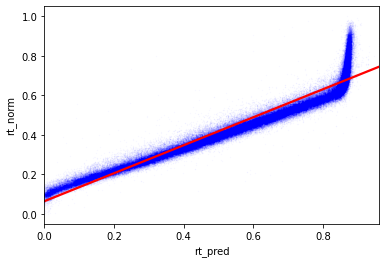

,R_square,R,slope,intercept,n_sample
0,0.924,0.961249,0.7075,0.065,204564.0


In [ ]:
psm_df = mq_reader.psm_df#.groupby(['sequence','mods','mod_sites','nAA'])['rt_norm'].median().reset_index()
predict_df = rt_model.predict(psm_df)

evaluate_linear_regression_plot(predict_df, x='rt_pred',y='rt_norm')
evaluate_linear_regression(predict_df, x='rt_pred',y='rt_norm')

## Test for KNN-based RT calibration on phl

Better but not very good. It is useful when we only have detected RT values without peptide information.

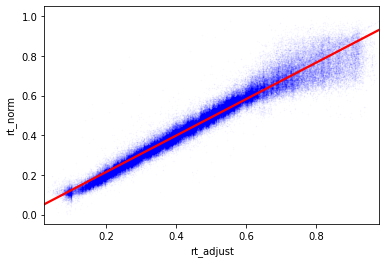

,R_square,R,slope,intercept,n_sample
0,0.954,0.976729,0.92,0.0312,199564.0


In [ ]:
import numpy as np
import pandas as pd
n_train = 5000

from peptdeep.utils import uniform_sampling
train_df, test_df = uniform_sampling(
    psm_df, target='rt_norm', n_train=n_train, return_test_df=True
)
predict_df = adjust_rt_pred(train_df, test_df)
evaluate_linear_regression_plot(predict_df, x='rt_adjust',y='rt_norm')
evaluate_linear_regression(predict_df, x='rt_adjust',y='rt_norm')

## Transfer learning on phl

In [ ]:
rt_model.train(train_df, epoch=20, verbose=True, verbose_each_epoch=False)

[Training] Epoch=1, Mean Loss=0.04316662267471353
[Training] Epoch=2, Mean Loss=0.03180241996111969
[Training] Epoch=3, Mean Loss=0.02344859668907399
[Training] Epoch=4, Mean Loss=0.020412476054237533
[Training] Epoch=5, Mean Loss=0.022304239954488974
[Training] Epoch=6, Mean Loss=0.017174581395617377
[Training] Epoch=7, Mean Loss=0.01700133458750012
[Training] Epoch=8, Mean Loss=0.019484098496225972
[Training] Epoch=9, Mean Loss=0.017604698572540656
[Training] Epoch=10, Mean Loss=0.015739520720671862
[Training] Epoch=11, Mean Loss=0.014358153430900225
[Training] Epoch=12, Mean Loss=0.01701598151703365
[Training] Epoch=13, Mean Loss=0.01492659382832547
[Training] Epoch=14, Mean Loss=0.01645984864444472
[Training] Epoch=15, Mean Loss=0.015095364292695498
[Training] Epoch=16, Mean Loss=0.017223474724839132
[Training] Epoch=17, Mean Loss=0.014123942285853749
[Training] Epoch=18, Mean Loss=0.015786654587524634
[Training] Epoch=19, Mean Loss=0.014934128208551556
[Training] Epoch=20, Mean Lo

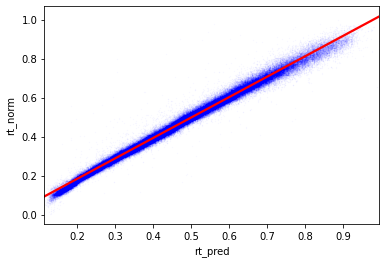

,R_square,R,slope,intercept,n_sample
0,0.989,0.994485,1.0476,-0.0262,199564.0


In [ ]:
predict_df = rt_model.predict(test_df)
evaluate_linear_regression_plot(predict_df, x='rt_pred',y='rt_norm')
evaluate_linear_regression(predict_df, x='rt_pred',y='rt_norm')